<a href="https://colab.research.google.com/github/akash-it89/DSE25_HR_hackathon/blob/main/Unsupervised_Heirarchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.3 MB/s eta 0:00:00


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Added for colormap
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
profile = ProfileReport(data, title = "Profile Report")

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 99.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data = data.drop(columns='CustomerID')

In [10]:
data.select_dtypes(exclude='object')

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [11]:
data_num_scaled = pd.DataFrame(StandardScaler().fit_transform(data.select_dtypes(exclude='object')), columns = data.select_dtypes(exclude = 'object').columns)

In [12]:
data_num_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [13]:
data = pd.concat([data.select_dtypes(include='object'), data_num_scaled], axis=1)

In [14]:
data['Genre'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [15]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1,-0.276302,2.268791,1.118061
196,1,0.441365,2.497807,-0.861839
197,0,-0.491602,2.497807,0.923953
198,0,-0.491602,2.917671,-1.250054


In [16]:
linkage_data = linkage(data, method= 'ward')

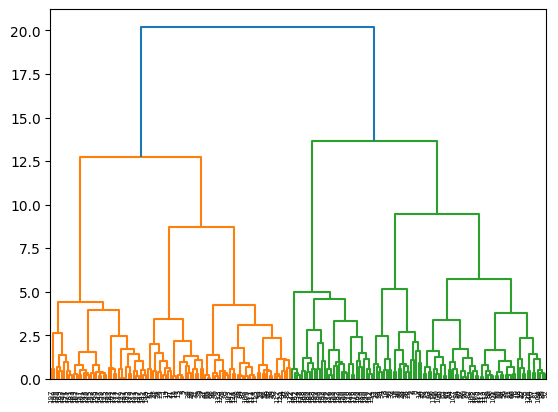

In [17]:
dendrogram(linkage_data)
plt.show()

In [18]:
hr_cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean')

In [19]:
hr_cluster.fit(data)

AgglomerativeClustering(n_clusters=6)

In [20]:
data_org = pd.read_csv('/content/Mall_Customers.csv')

In [21]:
data_org['hyr_label'] = hr_cluster.fit_predict(data)

In [22]:
data_org

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),hyr_label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,5
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [23]:
data_org['Genre'].replace({"Male":0, "Female": 1}, inplace= True)

In [24]:
data_org.groupby('hyr_label').mean()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
hyr_label,,,,,
0,82.100000,0.500000,54.960000,53.620000,48.240000
1,21.300000,0.650000,43.750000,25.250000,19.050000
2,166.090909,0.454545,41.454545,89.090909,16.181818
3,162.000000,0.538462,32.692308,86.538462,82.128205
4,91.714286,0.714286,26.142857,57.228571,48.685714
5,24.347826,0.565217,25.608696,26.434783,78.521739


# Cluster 0: Oldest, Income Medium, Spending Medium
# Cluster 1: Lowest Income, Spending Low
# Cluster 2: Highest Income, Lowest Spending, More Male
# Cluster 3: High Income, Highest Spending
# Cluster 4: Young Age, Medium Income, Medium Spending, More Female
# Cluster 5: Young, Low Income, High Spending

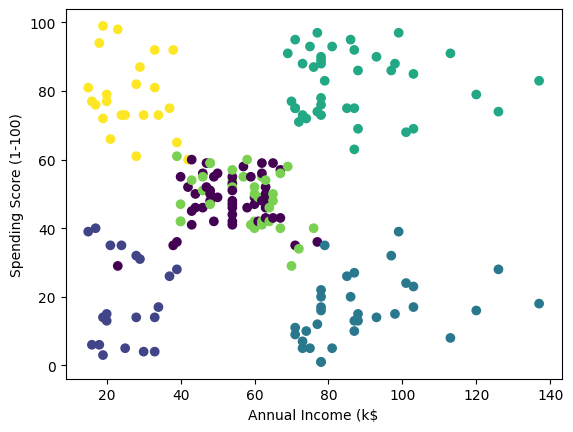

In [25]:
plt.scatter(data_org['Annual Income (k$)'], data_org['Spending Score (1-100)'], c = data_org['hyr_label'])
plt.xlabel('Annual Income (k$')
plt.ylabel('Spending Score (1-100)')
plt.show()

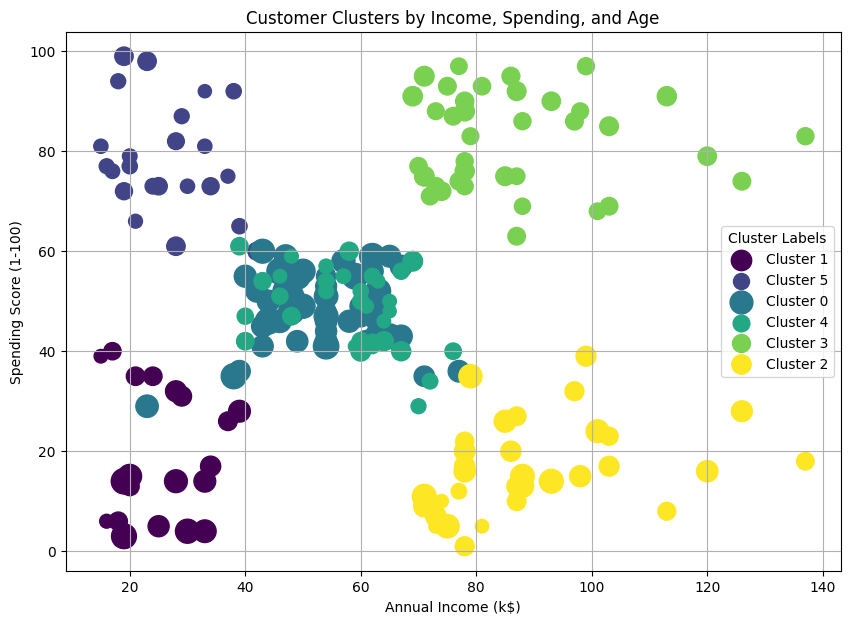

In [34]:
# Get unique cluster labels
unique_labels = data_org['hyr_label'].unique()

# Choose a colormap
colors = cm.get_cmap('viridis', len(unique_labels))

plt.figure(figsize=(10, 7)) # Set a larger figure size for better visibility

for i, label in enumerate(unique_labels):
    subset = data_org[data_org['hyr_label'] == label]
    plt.scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        s=subset['Age'] * 5,  # Size points by Age, scaled for better visual distinction
        color=colors(i),      # Assign a unique color for each cluster
        label=f'Cluster {label}' # Label for the legend
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters by Income, Spending, and Age') # Added a title
plt.legend(title='Cluster Labels') # Added legend with a title
plt.grid(True) # Added grid for readability
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
print("silhouette_score:", silhouette_score(data, hr_cluster.fit_predict(data)))

silhouette_score: 0.3504439354681972
